In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

ModuleNotFoundError: No module named 'config'

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | quixere
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | bom jesus da lapa
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | malanje
Processing Record 8 of Set 1 | emba
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | high rock
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 15 of Set 1 | saint-francois
Processing Record 16 of Set 1 | labuhan
Processing Record 17 of Set 1 | esna
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | arlit
Processing Record 2

Processing Record 37 of Set 4 | hirara
Processing Record 38 of Set 4 | egvekinot
Processing Record 39 of Set 4 | narsaq
Processing Record 40 of Set 4 | tsumeb
Processing Record 41 of Set 4 | paoua
Processing Record 42 of Set 4 | conde
Processing Record 43 of Set 4 | hasaki
Processing Record 44 of Set 4 | elko
Processing Record 45 of Set 4 | dunedin
Processing Record 46 of Set 4 | hashtgerd
Processing Record 47 of Set 4 | cedar city
Processing Record 48 of Set 4 | malwan
City not found. Skipping...
Processing Record 49 of Set 4 | humaita
Processing Record 50 of Set 4 | kushmurun
Processing Record 1 of Set 5 | abu dhabi
Processing Record 2 of Set 5 | ust-kamchatsk
City not found. Skipping...
Processing Record 3 of Set 5 | vaitape
Processing Record 4 of Set 5 | caska
Processing Record 5 of Set 5 | alofi
Processing Record 6 of Set 5 | broome
Processing Record 7 of Set 5 | muzhi
Processing Record 8 of Set 5 | kamina
Processing Record 9 of Set 5 | jambi
Processing Record 10 of Set 5 | belmon

Processing Record 25 of Set 8 | progreso
Processing Record 26 of Set 8 | outlook
Processing Record 27 of Set 8 | inta
Processing Record 28 of Set 8 | boralday
Processing Record 29 of Set 8 | kant
Processing Record 30 of Set 8 | malindi
Processing Record 31 of Set 8 | esmeraldas
Processing Record 32 of Set 8 | yerbogachen
Processing Record 33 of Set 8 | mandera
Processing Record 34 of Set 8 | calvinia
Processing Record 35 of Set 8 | nisia floresta
Processing Record 36 of Set 8 | hutchinson
Processing Record 37 of Set 8 | evensk
Processing Record 38 of Set 8 | buin
Processing Record 39 of Set 8 | carros
Processing Record 40 of Set 8 | scarborough
Processing Record 41 of Set 8 | grand baie
Processing Record 42 of Set 8 | mergui
City not found. Skipping...
Processing Record 43 of Set 8 | meadow lake
Processing Record 44 of Set 8 | chadiza
Processing Record 45 of Set 8 | nalvo
Processing Record 46 of Set 8 | sal rei
Processing Record 47 of Set 8 | skibbereen
Processing Record 48 of Set 8 | 

Processing Record 14 of Set 12 | moussoro
Processing Record 15 of Set 12 | san angelo
Processing Record 16 of Set 12 | brza palanka
Processing Record 17 of Set 12 | lucapa
Processing Record 18 of Set 12 | arroyos y esteros
Processing Record 19 of Set 12 | pop
Processing Record 20 of Set 12 | cabo san lucas
Processing Record 21 of Set 12 | ardahan
Processing Record 22 of Set 12 | mathathane
Processing Record 23 of Set 12 | asmara
Processing Record 24 of Set 12 | flin flon
Processing Record 25 of Set 12 | sabha
Processing Record 26 of Set 12 | uaua
Processing Record 27 of Set 12 | samdrup jongkhar
Processing Record 28 of Set 12 | tongliao
Processing Record 29 of Set 12 | kalomo
City not found. Skipping...
Processing Record 30 of Set 12 | satitoa
City not found. Skipping...
Processing Record 31 of Set 12 | port keats
Processing Record 32 of Set 12 | xining
Processing Record 33 of Set 12 | teterow
Processing Record 34 of Set 12 | thunder bay
Processing Record 35 of Set 12 | grindavik
Proce

In [10]:
len(city_data)

585

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,51.01,96,99,4.00,NZ,2021-04-13 17:07:43
1,New Norfolk,-42.7826,147.0587,55.99,81,100,1.01,AU,2021-04-13 17:07:20
2,Quixere,-5.0742,-37.9886,95.20,38,41,6.44,BR,2021-04-13 17:07:44
3,Nikolskoye,59.7035,30.7861,48.99,81,0,13.42,RU,2021-04-13 17:07:44
4,Bom Jesus Da Lapa,-13.2550,-43.4181,93.51,29,59,3.69,BR,2021-04-13 17:06:00
5,Hilo,19.7297,-155.0900,64.40,68,1,6.91,US,2021-04-13 17:07:44
6,Malanje,-9.5402,16.3410,68.00,86,98,2.21,AO,2021-04-13 17:07:45
7,Emba,48.8264,58.1442,53.49,64,6,15.61,KZ,2021-04-13 17:07:45
8,Ushuaia,-54.8000,-68.3000,48.20,57,0,6.91,AR,2021-04-13 17:07:45
9,Kapaa,22.0752,-159.3190,68.00,77,40,5.75,US,2021-04-13 17:07:46


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2021-04-13 17:07:43,-46.6000,168.3333,51.01,96,99,4.00
1,New Norfolk,AU,2021-04-13 17:07:20,-42.7826,147.0587,55.99,81,100,1.01
2,Quixere,BR,2021-04-13 17:07:44,-5.0742,-37.9886,95.20,38,41,6.44
3,Nikolskoye,RU,2021-04-13 17:07:44,59.7035,30.7861,48.99,81,0,13.42
4,Bom Jesus Da Lapa,BR,2021-04-13 17:06:00,-13.2550,-43.4181,93.51,29,59,3.69
5,Hilo,US,2021-04-13 17:07:44,19.7297,-155.0900,64.40,68,1,6.91
6,Malanje,AO,2021-04-13 17:07:45,-9.5402,16.3410,68.00,86,98,2.21
7,Emba,KZ,2021-04-13 17:07:45,48.8264,58.1442,53.49,64,6,15.61
8,Ushuaia,AR,2021-04-13 17:07:45,-54.8000,-68.3000,48.20,57,0,6.91
9,Kapaa,US,2021-04-13 17:07:46,22.0752,-159.3190,68.00,77,40,5.75


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

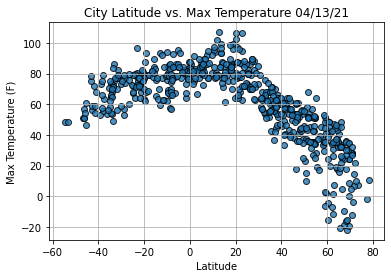

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

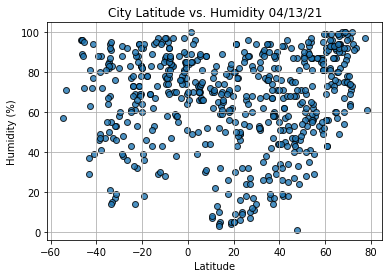

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

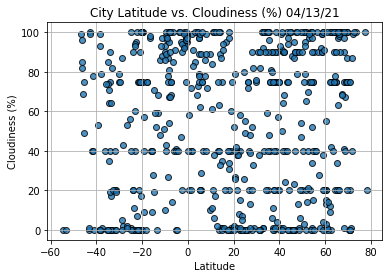

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

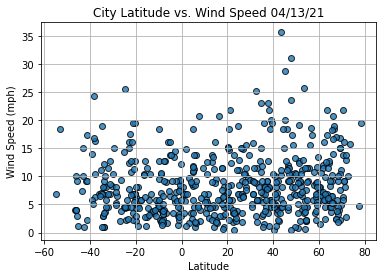

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress
# Create function to create perform linear regression on the weather data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13] 
index13

City               Saint-Francois
Country                        FR
Date          2021-04-13 17:07:47
Lat                       46.4154
Lng                        3.9054
Max Temp                       50
Humidity                       53
Cloudiness                      0
Wind Speed                   9.22
Name: 13, dtype: object

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

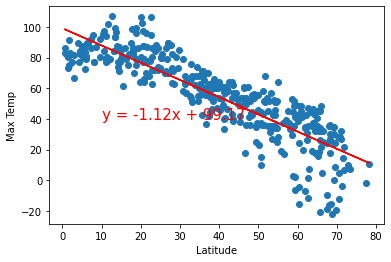

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

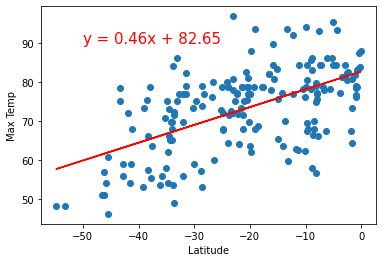

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

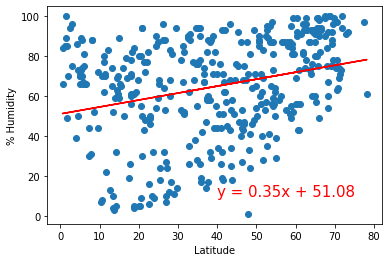

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

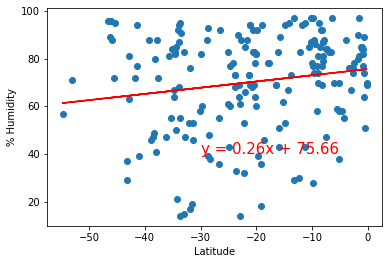

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-30,40))

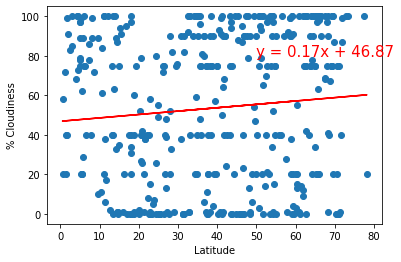

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(50,80))

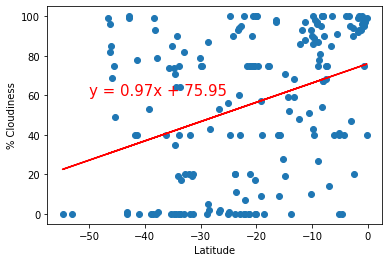

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

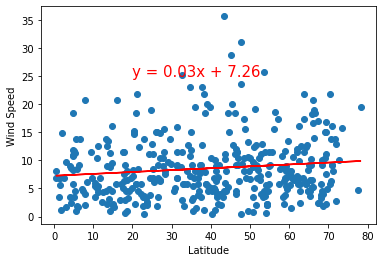

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20,25))

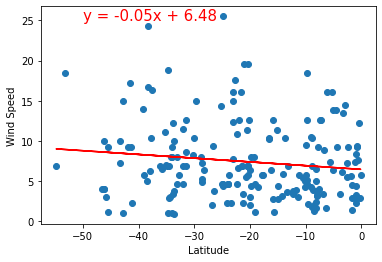

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))